# Lab 7

In this lab we discuss two-way table, conditional and marginal proportions, relative risk, and odds ratio.

## Two-way Table

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# Read .csv data
df = pd.read_csv("titanic.csv")
# The titanic.csv file contains data for 891 of the real Titanic passengers.
# Each row represents one person. The columns describe different attributes about the person including
# whether they survived, their ID, their ticket-class, and their gender.
df.head(5)

,PassengerID,LivingStatus,TicketClass,Sex
0,1,Died,3,male
1,2,Survived,1,female
2,3,Survived,3,female
3,4,Survived,1,female
4,5,Died,3,male


**pd.crosstab:** https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [3]:
# Two-way Table of LivingStatus vs. Sex
twoway_table = pd.crosstab(index = df["LivingStatus"], columns = df["Sex"])
twoway_table

Sex,female,male
LivingStatus,,
Died,81,468
Survived,233,109


In [4]:
# We can also present the table in another way.
table_new = twoway_table.stack().reset_index().rename(columns = {0:'Count'})
table_new

,LivingStatus,Sex,Count
0,Died,female,81
1,Died,male,468
2,Survived,female,233
3,Survived,male,109


**sns.barplot:** https://seaborn.pydata.org/generated/seaborn.barplot.html

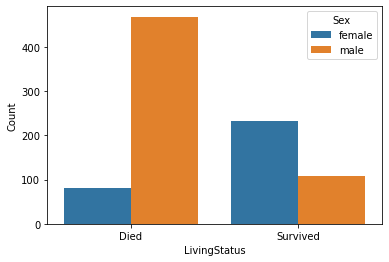

In [5]:
# Let's create a bidimensional barplot.
sns.barplot(x = "LivingStatus", hue = "Sex", y = "Count", data = table_new)
plt.show()

**mosaicplot:** https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html

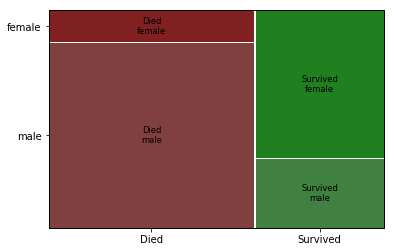

In [8]:
# the mosaic plot is a graphical method for visualizing data from two categorical variables.
# Simple mosaic plot, without counts or percentages
mosaic(df, ['LivingStatus', 'Sex'])
plt.show()

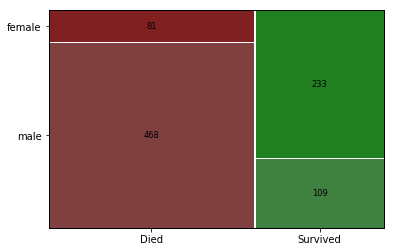

In [9]:
# Bonus! Adding the counts to the mosaic plot 
labelizer = lambda k:{('Died', 'female'):81, ('Died', 'male'):468,
                      ('Survived', 'female'):233, ('Survived', 'male'):109}[k]
mosaic(df, ['LivingStatus', 'Sex'], labelizer = labelizer)
plt.show()

## Marginal and Conditional Proportions

In [10]:
# Table of LivingStatus vs. TicketClass
# Getting the marginal counts (totals for each row and column)
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"], margins = True)

TicketClass,1,2,3,All
LivingStatus,,,,
Died,80,97,372,549
Survived,136,87,119,342
All,216,184,491,891


In [8]:
# Getting the proportion of counts along each column,
# i.e. the survival proportions conditional on ticket-class (dividing by the column totals)
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"], normalize = 'columns')

TicketClass,1,2,3
LivingStatus,,,
Died,0.37037,0.527174,0.757637
Survived,0.62963,0.472826,0.242363


In [11]:
# Getting the proportion of counts along each row (dividing by the row totals)
# i.e. the class proportions conditional on living status
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"], normalize = 'index')

TicketClass,1,2,3
LivingStatus,,,
Died,0.145719,0.176685,0.677596
Survived,0.397661,0.254386,0.347953


In [14]:
# Getting the total proportion of counts in each cell (dividing the table by the grand total)
# and the marginal proportions 
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"], normalize = 'all', margins=True)

TicketClass,1,2,3,All
LivingStatus,,,,
Died,0.089787,0.108866,0.417508,0.616162
Survived,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


In [18]:
#help(pd.crosstab)

## Relative Risk and Odds Ratio

In [37]:
# The following 2x2 table illustrates the number of cancer cases versus non-cancer cases for smokers and non-smokers.
df_new = pd.DataFrame({'Cancer-Yes':[30, 10], 'Cancer-No':[70, 90]}, index = ['Smoker', 'Non-Smoker'])
df_new

,Cancer-Yes,Cancer-No
Smoker,30,70
Non-Smoker,10,90


In [38]:
# let us calculate the proportions of developing cancer conditional on smoking status
p_smoker = 30/100
p_nonsmoker = 10/100

In [39]:
# the relative risk of developing cancer in the smoker group compared to non-smokers is:
RR = p_smoker/p_nonsmoker
print(RR)
round(RR,2) 

2.9999999999999996


3.0

**sm.stats.Table2x2:** https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.Table2x2.html

In [40]:
# Alternative way to find the relative risk
array = np.array([[30, 70], [10, 90]])
relative_risk = sm.stats.Table2x2(array).riskratio
print('Relative Risk =',round(relative_risk,2))

Relative Risk = 3.0


In [41]:
# Now we can also find the odds ratio (OR) of developing cancer in the smoker group compared to non-smokers:
odds_smoker = 30/70
odds_nonsmoker = 10/90
OR = odds_smoker/odds_nonsmoker
print('The odds ratio is', round(OR,2))

The odds ratio is 3.86


In [42]:
# Alternative way to find the odds ratio
odds_ratio = sm.stats.Table2x2(array).oddsratio
print('Odds Ratio =', odds_ratio.round(2))

Odds Ratio = 3.86
